# Problem 6

## Iterating Bayes' Theorem $n$ times with uniform prior

In [1]:
import numpy as np
import math
import pandas as pd
from scipy.stats import norm, poisson, binom
from tabulate import tabulate
import matplotlib
from IPython.display import display, Markdown
import matplotlib.pyplot as plt   # load pyplot package
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual



In [2]:
def bayes_pie(size_sample_space,size_parameter_space,prior,likelihood, observed_values):

    n = len(observed_values)

    parameter_space = list(range(size_parameter_space))

    k, r = divmod(n, 3)

    fig, axs = plt.subplots(k+1, 3, figsize=(10, 2*(k+1))) 

    labels = ['θ_'+str(i) for i in range(size_parameter_space)]  

    sorted_prior_indices = np.argsort(prior)
    above_02_indices = [i for i in sorted_prior_indices if prior[i] > 0.02]
    labels_prior = [labels[i] if i in above_02_indices else '' for i in range(size_parameter_space)]

    axs[0,0].pie(prior, labels = labels_prior)

    axs[0,0].set_title('prior')  

    for j in range(n):

        evidence = sum([prior[i]*likelihood[i][observed_values[j]] for i in range(size_parameter_space)])

        posterior = [prior[i]*likelihood[i][observed_values[j]]/evidence for i in range(size_parameter_space)]

        sorted_posterior_indices = np.argsort(posterior)
        above_02_indices = [i for i in sorted_posterior_indices if posterior[i] > 0.02]
        labels_posterior = [labels[i] if i in above_02_indices else '' for i in range(size_parameter_space)]

        prior = posterior

        if j < 2:
            axs[0,j+1].pie(posterior, labels=labels_posterior)
            axs[0,j+1].set_title('posterior_'+str(j+1))
        else:
            i1, j1 = divmod(j+1, 3)
            axs[i1,j1].pie(posterior, labels=labels_posterior)
            axs[i1,j1].set_title('posterior_'+str(j+1))

    for j in range(n, 3*k+2):
        i1, j1 = divmod(j+1, 3)
        axs[i1,j1].axis('off')

    return posterior

    

Set $n$ and $m$

In [8]:
n = 500     # number of trials

m = 100     # number of elements of the parameter space

Set data

In [7]:
my_data = [330, 313, 313, 55, 33, 1, 409, 300, 300, 300, 300, 400, 300, 200, 15, 15]

## Iterating Bayes' Theorem $n$ times with uniform prior

In [3]:
def bayes_pie_binomial(n,m, prior, observed_values):

    my_likelihood = [[None]*n for _ in range(m)]

    my_sample_space = np.arange(0, n)

    my_likelihood = [[None]*m for _ in range(m)]

    for i in range(m):

        my_likelihood[i] = binom.pmf(my_sample_space, n, (i+1)/(m+1))

    bayes_pie(n,m, prior, my_likelihood, observed_values)
    

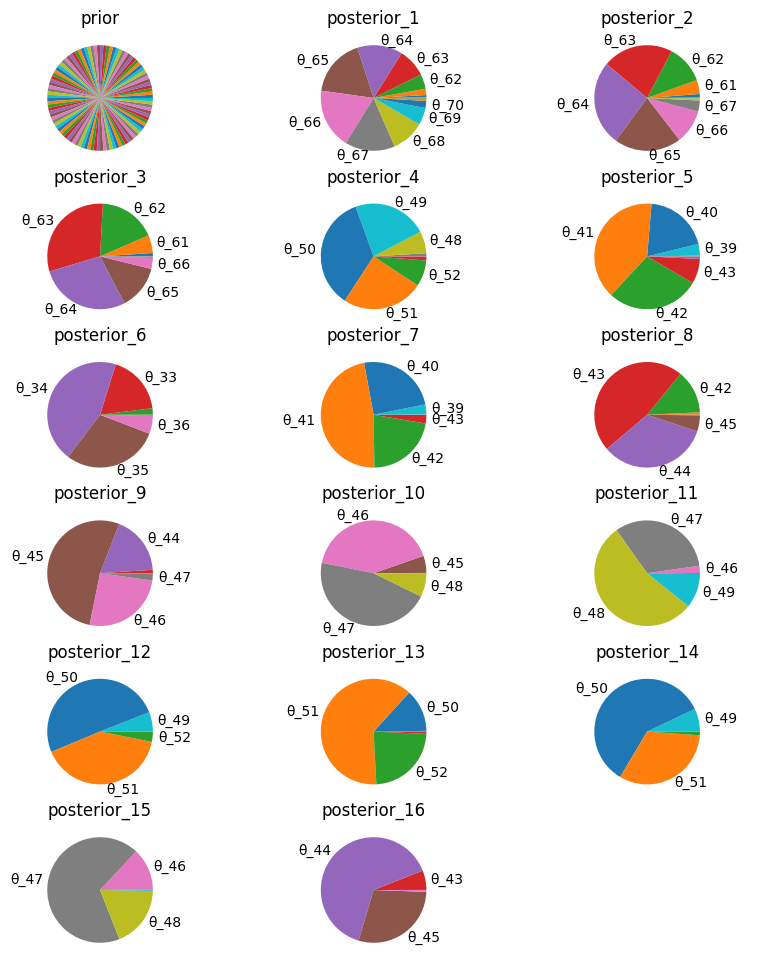

In [4]:

my_uniform_prior = [1/m]*m

bayes_pie_binomial(n, m, my_uniform_prior, my_data)

## Iterating Bayes' Theorem $n$ times with non-uniform prior

Set the prior of the first element $\theta_0$ of the parameter space

In [ ]:
my_nonuniform_prior[0] = .5

Then see the effect of iterating Bayes' Theorem with the same data and a non-uniform prior.

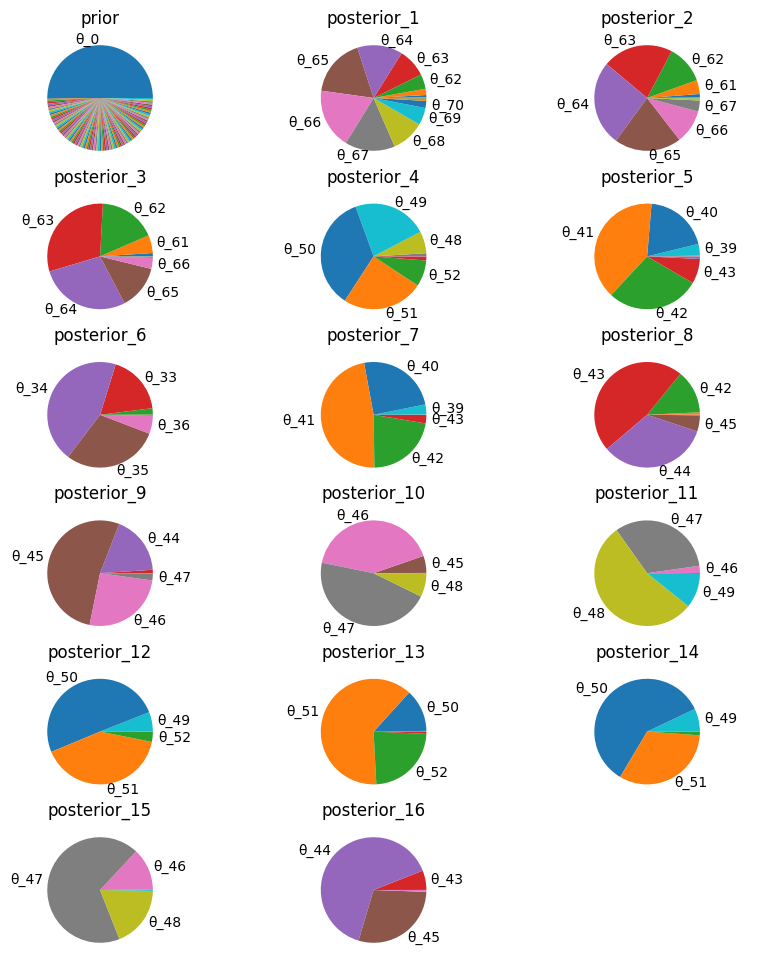

In [5]:

temp_prior = [(1-my_nonuniform_prior[0])/m]*m

for i in range(len(my_nonuniform_prior)):
    if i =! 0:
        my_nonuniform_prior[i] = temp_prior


bayes_pie_binomial(n, m, my_nonuniform_prior, my_data)